# &#x1F4D1; &nbsp; <span style="color:#338DD4"> Reflections. Intro to Algorithms. Lessons 1-2</span>

###  &#x1F578; &nbsp; Links

Graph Structures: https://visualgo.net/graphds

NetworkX documentation: http://networkx.readthedocs.io/en/latest/index.html

###  &#x1F578; &nbsp;  Lesson 1. A Social Network

Эйлеровым путем в графе называется путь, который проходит по каждому ребру, причем ровно один раз.

В неориентированном графе
Согласно теореме, доказанной Эйлером, эйлеров цикл существует тогда и только тогда, когда граф связный и в нём отсутствуют вершины нечётной степени.
Эйлеров путь в графе существует тогда и только тогда, когда граф связный и содержит не более двух вершин нечётной степени. Ввиду леммы о рукопожатиях, число вершин с нечётной степенью должно быть четным. А значит эйлеров путь существует только тогда, когда это число равно нулю или двум. Причём когда оно равно нулю, эйлеров путь вырождается в эйлеров цикл.

В ориентированном графе
Ориентированный граф G=(V,A) содержит эйлеров цикл тогда и только тогда, когда он сильно связан и для каждой вершины графа её полустепень захода равна её полустепени исхода, то есть в вершину входит столько же ребер, сколько из неё и выходит.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
G=nx.complete_graph(7)
print(list(nx.eulerian_circuit(G)))
print('')
print(list(nx.eulerian_circuit(G,source=1)))
print('')
print([u for u,v in nx.eulerian_circuit(G)])

[(0, 6), (6, 5), (5, 4), (4, 6), (6, 3), (3, 5), (5, 2), (2, 4), (4, 3), (3, 2), (2, 6), (6, 1), (1, 5), (5, 0), (0, 4), (4, 1), (1, 3), (3, 0), (0, 2), (2, 1), (1, 0)]

[(1, 6), (6, 5), (5, 4), (4, 6), (6, 3), (3, 5), (5, 2), (2, 4), (4, 3), (3, 2), (2, 6), (6, 0), (0, 5), (5, 1), (1, 4), (4, 0), (0, 3), (3, 1), (1, 2), (2, 0), (0, 1)]

[0, 6, 5, 4, 6, 3, 5, 2, 4, 3, 2, 6, 1, 5, 0, 4, 1, 3, 0, 2, 1]


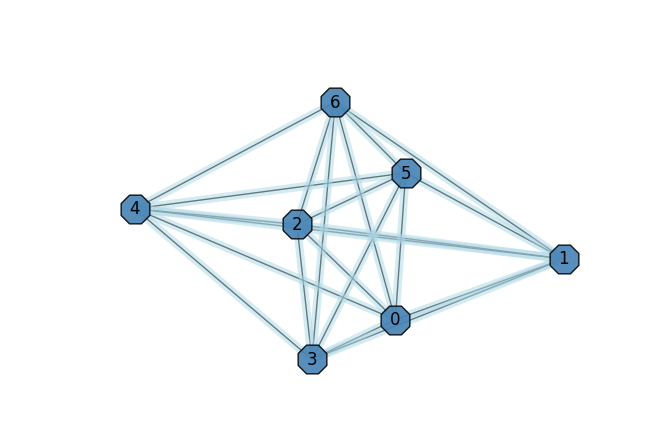

In [3]:
pos=nx.fruchterman_reingold_layout(G)
nx.draw(G, pos, with_labels=True, node_shape='8', node_size=500, 
        node_color='steelblue', edge_color='black', width=1, alpha=0.9)
nx.draw_networkx_edges(G, pos, edgelist=list(nx.eulerian_circuit(G)),
                       edge_color = 'lightblue', width=6, alpha=0.5)

In [4]:
def subgraph(visited, _current, graph):
    if not graph:
        return visited + [_current]

    for i, edge in enumerate(graph):
        current, next = edge
        if _current not in edge:
            continue

        _graph = graph[:]
        del _graph[i]

        if _current == current:
            result = subgraph(visited + [current], next, _graph)
        else:
            result = subgraph(visited + [next], current, _graph)

        if result:
            return result
def eulerian_tour(graph):
    head, tail = graph[0], graph[1:]
    previous, next = head
    return subgraph([previous], next, tail)

In [5]:
print(eulerian_tour([(1, 2), (2, 3), (3, 4), (4, 1)]))

[1, 2, 3, 4, 1]


In [13]:
# Case Study
def naive(a, b):
    x = a
    y = b
    z = 0
    while x > 0:
        z = z + y
        x = x - 1
    return z

In [14]:
print(naive(2, 30), naive(5, 7), naive(8, 15))

60 35 120


In [15]:
def russian(a,b):
    (x, y, z) = (a, b, 0)
    while x > 0:
        if x % 2 == 1:
            z = z + y
        y = y << 1
        x = x >> 1
    return z
russian(18,9)

162

Оператор a >> n возвращает число, которое получается из a сдвигом всех бит на n позиций вправо, при этом самые правые n бит отбрасываются. Например:

a = 43      # 0b101011

b = a >> 1  # 0b10101 == 21

c = a >> 2  # 0b1010 == 10

d = a >> 3  # 0b101 == 5

e = a >> 5  # 0b1 == 1

Понятно, что для положительных чисел битовый сдвиг числа вправо на n равносилен целочисленному делению на 2^n. Для отрицательных чисел в языке Питон операции битового сдвига неприменимы.

Аналогично, битовый сдвиг влево на n бит равносилен (для положительных чисел) умножению на 2^n и осуществляется при помощи оператора <<:
a = 5       # 0b101

b = a << 1  # 0b1010 == 10

c = a << 2  # 0b10100 == 20

d = 2 << 3  # 0b101000 == 40

In [16]:
import math

def time(n):
    """ Return the number of steps 
    necessary to calculate
    `print countdown(n)`"""
    steps = 0
    if n % 5 == 0:
        steps = 2*n/5 + 3
    else:
        steps = 2*(n/5 + 1) + 3
    # YOUR CODE HERE
    return steps

print (time(50), time(51))

def countdown(x):
    y = 0
    while x > 0:
        x = x - 5
        y = y + 1
    print (y)

print (countdown(50))

23.0 25.4
10
None


In [17]:
# counting steps in naive as a function of a

def time(a):
    # The number of steps it takes to execute naive(a, b)
    # as a function of a
    
    # your code here
    return 2*a + 3
    
print (time(2))

7


In [18]:
def recursive_russian(a,b):
    if a == 0:
        return 0
    if a % 2 == 0:
        return 2 * recursive_russian(a/2,b)
    return b + 2 * recursive_russian((a-1)/2,b)
russian(18,9)

162

###  &#x1F578; &nbsp;  Problem Set 1

In [19]:
# Find Eulerian Tour
#
# Write a function that takes in a graph
# represented as a list of tuples
# and return a list of nodes that
# you would follow on an Eulerian Tour
#
# For example, if the input graph was
# [(1, 2), (2, 3), (3, 1)]
# A possible Eulerian tour would be [1, 2, 3, 1]

graph = [(0, 1), (1, 5), (1, 7), (4, 5), (4, 8), (1, 6), (3, 7), (5, 9), (2, 4), (0, 4), (2, 5), (3, 6), (8, 9)]

def edge(x, y):
    return (x, y) if x < y else (y, x)

def get_nodes(graph):
    nodes = []
    for element in graph:
        if element[0] not in nodes:
            nodes.append(element[0])
        if element[1] not in nodes:
            nodes.append(element[1])   
    return nodes

def diff_list(l1,l2):
    diff = []
    for element in l1:
        if element not in l2:
            diff.append(element)
    return diff

def create_tour(nodes):
    tour_list = []
    n = len(nodes)
    for i in range(n):
        t = edge(nodes[i], nodes[(i+1) % n])
        tour_list.append(t)
    return tour_list

def get_degree(tour):
    degree = {}
    for x, y in tour:
        degree[x] = degree.get(x, 0) + 1
        degree[y] = degree.get(y, 0) + 1
    return degree

print (get_degree(graph))

def check_edge(t, b, nodes):
    """
    t: tuple representing an edge
    b: origin node
    nodes: set of nodes already visited

    if we can get to a new node from `b` following `t`
    then return that node, else return None
    """
    if t[0] == b:
        if t[1] not in nodes:
            return t[1]
    elif t[1] == b:
        if t[0] not in nodes:
            return t[0]
    return None

def connected_nodes(tour):
    """return the set of nodes reachable from
    the first node in `tour`"""
    a = tour[0][0]
    nodes = set([a])
    explore = set([a])
    while len(explore) > 0:
        # see what other nodes we can reach
        b = explore.pop()
        for t in tour:
            node = check_edge(t, b, nodes)
            if node is None:
                continue
            nodes.add(node)
            explore.add(node)
    return nodes

def is_eulerian_tour(nodes, tour):
    # all nodes must be even degree
    # and every node must be in graph
    degree = get_degree(tour)
    for node in nodes:
        try:
            d = degree[node]
            if d % 2 == 1:
                print ("Node %s has odd degree" % node)
                return False
        except KeyError:
            print ("Node %s was not in your tour" % node)
            return False
    connected = connected_nodes(tour)
    if len(connected) == len(nodes):
        return True
    else:
        print ("Your graph wasn't connected")
        return False

print (is_eulerian_tour(get_nodes(graph), graph))

def get_way(graph):
    node_set = get_nodes(graph)
    current_node = node_set[1]
    current_edge = graph[0]
    visited_edges = [current_edge]
    eulerian_tour = [current_edge[0], current_edge[1]]
    for v in range(int(len(graph)/2)):
        for element in graph[1:]:            
            for i in range(2):
                if i == 0: j =1
                else: j = 0
                if element not in visited_edges and element[i] == current_node:
                    eulerian_tour.append(element[j])
                    visited_edges.append(element)
                    current_node = element[j]
    rest = diff_list(graph,visited_edges)
    return eulerian_tour, rest

print (get_way(graph)[0])

def find_eulerian_tour(graph):
    nodes = get_nodes(graph)
    if not is_eulerian_tour(nodes, graph):
        print ("Your graph has not Eulerian Tour")
        return None    
    result = get_way(graph)[0]
    rest = get_way(graph)[1]
    if rest == []:
        return result
    current_result = get_way(rest)[0]
    current_rest = get_way(rest)[0]
    i = result.index(current_result[0])
    result = result[:i] + current_result + result[i+1:]
        
    return result

print (find_eulerian_tour(graph)) 

{0: 2, 1: 4, 2: 2, 3: 2, 4: 4, 5: 4, 6: 2, 7: 2, 8: 2, 9: 2}
True
[0, 1, 5, 4, 8, 9, 5, 2, 4, 0]
[0, 1, 7, 3, 6, 1, 5, 4, 8, 9, 5, 2, 4, 0]


In [20]:
# Write a function, `count`
# that returns the units of time
# where each print statement is one unit of time
# and each evaluation of range also takes one unit of time

def count(n):
    # Your code here to count the units of time
    # it takes to execute clique
    return 2 + n * (n + 1) / 2

def clique(n):
    print ("in a clique...")
    for j in range(n):
        for i in range(j):
            print (i, "is friends with", j)

In [21]:
# Find Eulerian Tour
#
# Write a function that takes in a graph
# represented as a list of tuples
# and return a list of nodes that
# you would follow on an Eulerian Tour
#
#For example, if the input graph was
graph = [(0, 1), (1, 5), (1, 7), (4, 5), (4, 8), (1, 6), (3, 7), (5, 9), (2, 4), (0, 4), (2, 5), (3, 6), (8, 9)]
#A possible Eulerian tour would be [1, 2, 3, 1]
def nodes_list(graph):
    nodes_list = []
    for e in graph:
        for i in range(2):
            if e[i] not in nodes_list:
                nodes_list.append(e[i])
    return nodes_list

def edge(x, y):
    return (x, y) if x < y else (y, x)

def create_tour(nodes):
    tour_list = []
    n = len(nodes)
    for i in range(n):
        t = edge(nodes[i], nodes[(i+1) % n])
        tour_list.append(t)
    return tour_list

def get_degree(tour):
    degree = {}
    for x, y in tour:
        degree[x] = degree.get(x, 0) + 1
        degree[y] = degree.get(y, 0) + 1
    return degree

def check_edge(t, b, nodes):
    """
    t: tuple representing an edge
    b: origin node
    nodes: set of nodes already visited

    if we can get to a new node from `b` following `t`
    then return that node, else return None
    """
    if t[0] == b:
        if t[1] not in nodes:
            return t[1]
    elif t[1] == b:
        if t[0] not in nodes:
            return t[0]
    return None

def connected_nodes(tour):
    """return the set of nodes reachable from
    the first node in `tour`"""
    a = tour[0][0]
    nodes = set([a])
    explore = set([a])
    while len(explore) > 0:
        # see what other nodes we can reach
        b = explore.pop()
        for t in tour:
            node = check_edge(t, b, nodes)
            if node is None:
                continue
            nodes.add(node)
            explore.add(node)
    return nodes

def is_eulerian_tour(nodes, tour):
    # all nodes must be even degree
    # and every node must be in graph
    degree = get_degree(tour)
    for node in nodes:
        try:
            d = degree[node]
            if d % 2 == 1:
                print ("Node %s has odd degree" % node)
                return False
        except KeyError:
            print ("Node %s was not in your tour" % node)
            return False
    connected = connected_nodes(tour)
    if len(connected) == len(nodes):
        return True
    else:
        print ("Your graph wasn't connected")
        return False

def invert_element(element):
    return (element[1],element[0])

def find_eulerian_tour(graph):
    nodes = nodes_list(graph)
    print (nodes)
    tour = create_tour(nodes)
    print (tour)
    z = 0
    for element in tour:
        inv = invert_element(element)
        if element or inv in graph:
            z = z+1
    if z == len(graph):
        nodes.append(nodes[0])
        result = nodes
    else:
        result = None
    return result           

print (find_eulerian_tour(graph))

[0, 1, 5, 7, 4, 8, 6, 3, 9, 2]
[(0, 1), (1, 5), (5, 7), (4, 7), (4, 8), (6, 8), (3, 6), (3, 9), (2, 9), (0, 2)]
None


[(0, 4), (4, 5), (5, 9), (9, 8), (8, 4), (4, 2), (2, 5), (5, 1), (1, 7), (7, 3), (3, 6), (6, 1), (1, 0)]


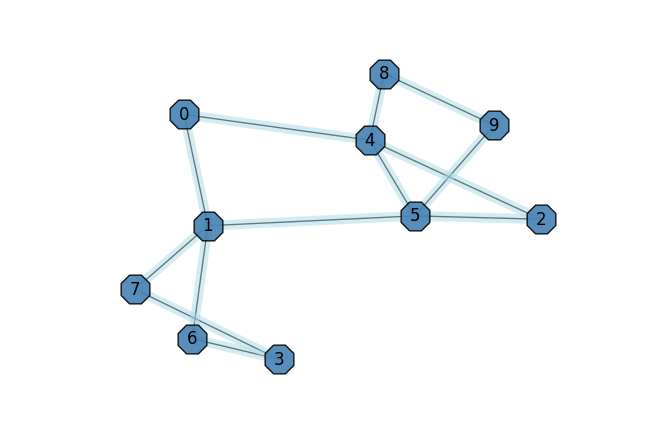

In [22]:
G1=nx.Graph()
G1.add_edges_from(graph)
print(list(nx.eulerian_circuit(G1)))
pos=nx.fruchterman_reingold_layout(G1)
nx.draw(G1, pos, with_labels=True, node_shape='8', node_size=500, 
        node_color='steelblue', edge_color='black', width=1, alpha=0.9)
nx.draw_networkx_edges(G1, pos, edgelist=list(nx.eulerian_circuit(G1)),
                       edge_color = 'lightblue', width=7, alpha=0.5)

###  &#x1F578; &nbsp;  Lesson 2. Growth Rates in Social Networks

Θ Definition: A theoretical measure of the execution of an algorithm, usually the time or memory needed, given the problem size n, which is usually the number of items. 

Informally, saying some equation f(n) = Θ (g(n)) means it is within a constant multiple of g(n). The equation is read, "f of n is theta g of n".

Formal Definition: f(n) = Θ (g(n)) means there are positive constants c1, c2, and k, such that 0 ≤ c1g(n) ≤ f(n) ≤ c2g(n) for all n ≥ k. The values of c1, c2, and k must be fixed for the function f and must not depend on n. 

The adjacency matrix of a graph is a matrix whose rows and columns are both indexed by vertices of the graph, with a one in the cell for row i and column j when vertices i and j are adjacent, and a zero otherwise.

In mathematics, and more specifically in graph theory, a graph is a representation of a set of objects where some pairs of objects are connected by links. The interconnected objects are represented by mathematical abstractions called vertices (also called nodes or points), and the links that connect some pairs of vertices are called edges (also called arcs or lines).

An undirected graph is a graph in which edges have no orientation. The edge (x, y) is identical to the edge (y, x), i.e., they are not ordered pairs, but sets {x, y} (or 2-multisets) of vertices. The maximum number of edges in an undirected graph without a loop is n(n − 1)/2.

A weighted graph is a graph in which a number (the weight) is assigned to each edge.

A regular graph is a graph in which each vertex has the same number of neighbours, i.e., every vertex has the same degree. A regular graph with vertices of degree k is called a k‑regular graph or regular graph of degree k.

- circular graph is a graph that consists of a single cycle, or in other words, some number of vertices connected in a closed chain. The cycle graph with n vertices is called Cn. The number of vertices in Cn equals the number of edges, and every vertex has degree 2

- a cage is a regular graph with the smallest possible order for its girth

- a planar graph is a graph whose vertices and edges can be drawn in a plane such that no two of the edges intersect

- a tree is a connected graph with no cycles

- a forest is a graph with no cycles, i.e. the disjoint union of one or more trees

- a hypercube graph is a graph formed from the vertices and edges of a geometric hypercube

- a star is a tree with one internal vertex; equivalently, it is a complete bipartite graph K1,n for some n ≥ 2; the special case of a star with three leaves is called a claw


In [ ]:
#
# How many edges in a complete graph on n nodes? 
# 

def clique(n):
    # Return the number of edges
    # Try to use a mathematical formula...
    return n*(n-1)/2
    
print (clique(10))

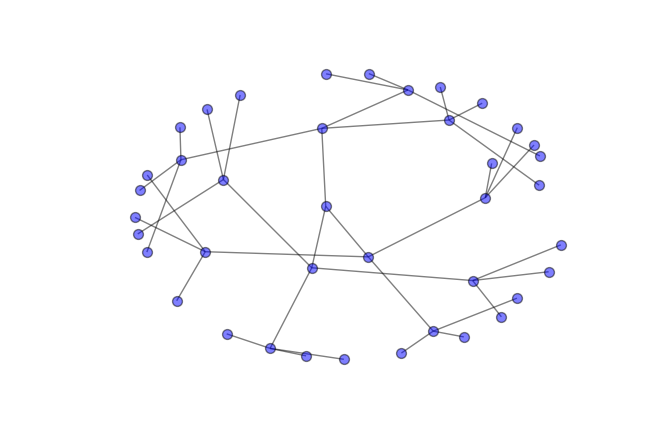

In [43]:
import pydot
# from networkx.drawing.nx_pydot import graphviz_layout
T = nx.balanced_tree(3, 3)
pos=nx.spring_layout(T)
nx.draw(T,pos,with_labels=False,arrows=False, 
       node_size=50, alpha=0.5, node_color="blue")

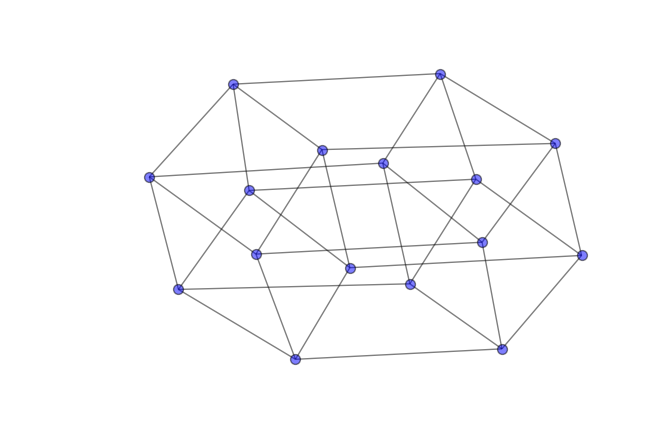

In [54]:
H = nx.hypercube_graph(4)
pos=nx.spring_layout(H)
nx.draw(H,pos,with_labels=False,arrows=False, 
       node_size=50, alpha=0.5, node_color="blue")

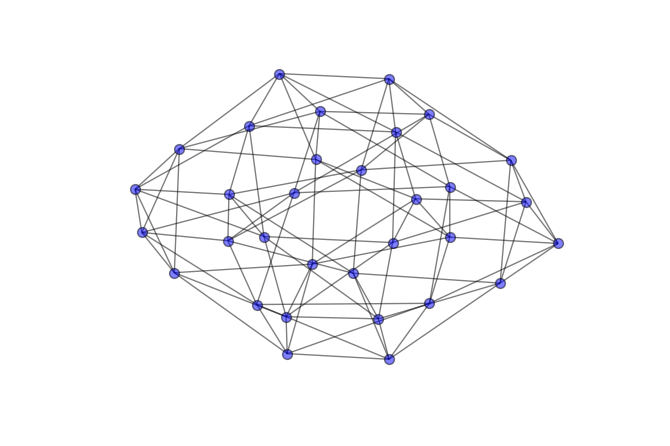

In [56]:
C = nx.make_max_clique_graph(H)
pos=nx.spring_layout(C)
nx.draw(C,pos,with_labels=False,arrows=False, 
       node_size=50, alpha=0.5, node_color="blue")

###  &#x1F578; &nbsp;  Problem Set 2

In [57]:
# 1
# Write a program that returns the number of edges
# in a star network that has `n` nodes 
#

def star_network(n):
    # return number of edges
    return n-1

In [61]:
# 7
# Generate a combination lock graph given a list of nodes
#

def make_link(G, node1, node2):
    if node1 not in G:
        G[node1] = {}
    (G[node1])[node2] = 1
    if node2 not in G:
        G[node2] = {}
    (G[node2])[node1] = 1
    return G

def create_combo_lock(nodes):
    G = {}
    make_link(G, nodes[0], nodes[1])
    for i in range(len(nodes)-2):
        make_link(G, nodes[i+1], nodes[i+2])
        make_link(G, nodes[0], nodes[i+2])
    # your code here
    return G

##############
# Code for testing
#
def is_chain(graph, nodes):
    # find the first node with degree one
    start = (n for n, e in graph.iteritems()
             if len(e) == 1).next()
    count = 1
    # keep track of what we've seen to make
    # sure there are no cycles
    seen = set([start])
    # follow the edges
    prev = None
    current = start
    while True:
        nexts = graph[current].keys()
        # get rid of the edge back to prev
        nexts = [n for n in nexts if not n == prev]
        if len(nexts) > 1:
            # bad.  too many edges to be a chain
            return False
        elif len(nexts) == 0:
            # We're done following the chain
            # Did we get enough edges:
            return count == len(nodes)
        prev = current
        current = nexts[0]
        if current in seen:
            # bad.  this isn't a chain
            # it has a loop
            return False
        seen.add(current)
        count += 1

def is_combo_lock(graph, nodes):
    # first see if we have a star
    center = None
    degree = None
    for node, edges in graph.iteritems():
        if len(edges) > degree:
            center = node
            degree = len(edges)
    if not degree == len(nodes) - 1:
        return False
    # make a graph out of all the edges
    # not connected to the center
    chain = {}
    for node, edges in graph.iteritems():
        if node == center:
            continue
        for e in edges:
            if e == center:
                continue
            make_link(chain, node, e)
    return is_chain(chain, [n for n in nodes if n != center])

def test():
    for n in [5, 10, 20]:
        combo = create_combo_lock(range(n))
        if not is_combo_lock(combo, range(n)):
            return False
    return True
